In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns

In [2]:
PD_Dummy_DataFrame = pd.read_csv('parkinsons.csv')

In [3]:
Parkinson_csv = pd.read_csv('parkinsons.csv')
Parkinson_csv.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [4]:
Parkinson_csv.shape

(195, 24)

In [5]:

from sklearn.preprocessing import StandardScaler

# Separate features from target
# Remove the 'status' and 'name' columns
X = Parkinson_csv.drop(columns=['status', 'name'])
y = Parkinson_csv['status']  # Target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [6]:
y1 = y

In [7]:
from sklearn.decomposition import PCA

# Create PCA instance
n_components = 10  # Choose the number of principal components
pca = PCA(n_components=n_components)

# Fit and transform the data using PCA
X_pca = pca.fit_transform(X_scaled)

In [8]:
X_scaled

array([[-0.82929965, -0.43616456, -0.95203729, ...,  0.48047686,
        -0.21053082,  0.86888575],
       [-0.77097169, -0.53097409, -0.05772056, ...,  1.31118546,
         0.27507712,  1.80360503],
       [-0.90947638, -0.7231683 , -0.10987483, ...,  1.01768236,
        -0.10362861,  1.40266141],
       ...,
       [ 0.49557839,  0.47010361, -0.96839309, ..., -0.81807931,
         0.78033848, -0.83241014],
       [ 1.07876114,  2.19004398, -0.95417967, ..., -0.22906571,
        -0.63700298, -0.92610456],
       [ 1.45481664,  0.69224632, -0.88348115, ..., -0.43085284,
         0.45480231, -0.64505466]])

In [9]:
explained_variance_ratio = pca.explained_variance_ratio_
print("Explained Variance Ratio:", explained_variance_ratio)

Explained Variance Ratio: [0.58900504 0.1129943  0.07009226 0.06659028 0.04426891 0.03314129
 0.02510204 0.01647288 0.01317446 0.01018756]


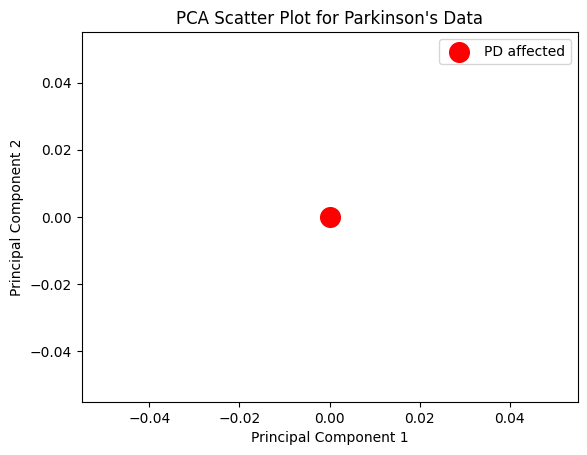

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# ... Your code to create PCA and scatter plot ...

# Adding labels and title
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title("PCA Scatter Plot for Parkinson's Data")

# Adding a cherry on top
plt.scatter([0], [0], marker='o', color='red', s=200, label='PD affected')
plt.legend()

# Display the plot
plt.show()

In [11]:
# Create classifier object
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)

In [12]:
# Train the classifier using the training data
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [16]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier


# Load your dataset (replace with your dataset loading code)
data = Parkinson_csv


# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

# Define the hyperparameter grids for each algorithm
param_grid_knn = {'n_neighbors': [3, 5, 7, 9]}
param_grid_svm = {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']}
param_grid_lr = {'C': [0.1, 1, 10]}
param_grid_rf = {'n_estimators': [100, 200, 300], 'max_depth': [None, 10, 20]}

# Create instances of the classifiers
knn = KNeighborsClassifier()
svm = SVC()
lr = LogisticRegression()
rf = RandomForestClassifier()

# Create GridSearchCV instances for each classifier
grid_search_knn = GridSearchCV(knn, param_grid_knn, cv=5)
grid_search_svm = GridSearchCV(svm, param_grid_svm, cv=5)
grid_search_lr = GridSearchCV(lr, param_grid_lr, cv=5)
grid_search_rf = GridSearchCV(rf, param_grid_rf, cv=5)

# Fit the GridSearchCV instances
grid_search_knn.fit(X_train, y_train)
grid_search_svm.fit(X_train, y_train)
grid_search_lr.fit(X_train, y_train)
grid_search_rf.fit(X_train, y_train)

# Print the best hyperparameters and best scores for each algorithm
print("KNN - Best Hyperparameters:", grid_search_knn.best_params_)
print("KNN - Best Score:", grid_search_knn.best_score_)
print("SVM - Best Hyperparameters:", grid_search_svm.best_params_)
print("SVM - Best Score:", grid_search_svm.best_score_)
print("Logistic Regression - Best Hyperparameters:", grid_search_lr.best_params_)
print("Logistic Regression - Best Score:", grid_search_lr.best_score_)
print("Random Forest - Best Hyperparameters:", grid_search_rf.best_params_)
print("Random Forest - Best Score:", grid_search_rf.best_score_)

C:\Users\Admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Admin\AppData\Local\Packages\PythonSoftwareFoundation.Pyth

KNN - Best Hyperparameters: {'n_neighbors': 3}
KNN - Best Score: nan
SVM - Best Hyperparameters: {'C': 1, 'kernel': 'linear'}
SVM - Best Score: 0.8655241935483872
Logistic Regression - Best Hyperparameters: {'C': 10}
Logistic Regression - Best Score: 0.8528225806451614
Random Forest - Best Hyperparameters: {'max_depth': None, 'n_estimators': 100}
Random Forest - Best Score: 0.9100806451612904


In [17]:
X_test[:]

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,MDVP:APQ,Shimmer:DDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE
138,112.239,126.609,104.095,0.00472,0.000040,0.00238,0.00290,0.00715,0.05643,0.517,...,0.04451,0.09211,0.02629,17.366,0.640945,0.701404,-5.634576,0.306014,2.419253,0.209191
16,144.188,349.259,82.764,0.00544,0.000040,0.00211,0.00292,0.00632,0.02047,0.192,...,0.02074,0.02908,0.01859,22.333,0.567380,0.644692,-5.440040,0.239764,2.264501,0.218164
155,117.870,127.349,95.654,0.00647,0.000050,0.00356,0.00300,0.01067,0.03087,0.276,...,0.02402,0.04977,0.02631,22.431,0.628300,0.652025,-3.583722,0.207914,2.439597,0.206256
96,159.116,168.913,144.811,0.00342,0.000020,0.00178,0.00184,0.00535,0.03381,0.307,...,0.02809,0.05417,0.00852,22.663,0.366329,0.693429,-6.417440,0.194627,2.473239,0.151709
68,143.533,162.215,65.809,0.01101,0.000080,0.00647,0.00467,0.01941,0.05384,0.478,...,0.03392,0.09455,0.04882,20.338,0.513237,0.731444,-5.869750,0.151814,2.118496,0.185580
153,121.345,139.644,98.250,0.00684,0.000060,0.00388,0.00332,0.01164,0.02534,0.241,...,0.02056,0.04019,0.04179,21.520,0.566867,0.670475,-4.865194,0.246404,2.013530,0.168581
55,109.860,126.358,104.437,0.00874,0.000080,0.00398,0.00539,0.01193,0.03209,0.307,...,0.02454,0.05368,0.01180,20.767,0.558586,0.811843,-4.333543,0.221727,2.014606,0.344834
15,142.167,217.455,83.159,0.00369,0.000030,0.00157,0.00203,0.00471,0.01503,0.126,...,0.01359,0.02316,0.00839,25.175,0.565924,0.658245,-5.340115,0.210185,2.205546,0.234589
112,204.664,221.300,189.621,0.00841,0.000040,0.00502,0.00485,0.01506,0.02378,0.210,...,0.01767,0.03831,0.01316,21.305,0.498877,0.722085,-4.876336,0.212054,2.376749,0.268144
111,208.519,220.315,199.020,0.00609,0.000030,0.00368,0.00339,0.01105,0.01761,0.155,...,0.01307,0.02855,0.00830,22.407,0.338097,0.712466,-6.471427,0.184378,2.502336,0.136390


In [18]:
X_test.iloc[[0]].T

,138
MDVP:Fo(Hz),112.239000
MDVP:Fhi(Hz),126.609000
MDVP:Flo(Hz),104.095000
MDVP:Jitter(%),0.004720
MDVP:Jitter(Abs),0.000040
MDVP:RAP,0.002380
MDVP:PPQ,0.002900
Jitter:DDP,0.007150
MDVP:Shimmer,0.056430
MDVP:Shimmer(dB),0.517000


In [19]:
y_test.iloc[[0]]

138    1
Name: status, dtype: int64

In [36]:
Random_Forest_Model = RandomForestClassifier(max_depth=None, n_estimators=100)

In [37]:
Random_Forest_Model.fit(X_train, y_train)
Random_Forest_Model.score(X_test, y_test)

0.9487179487179487

In [22]:
X_test.iloc[[0]].T

,138
MDVP:Fo(Hz),112.239000
MDVP:Fhi(Hz),126.609000
MDVP:Flo(Hz),104.095000
MDVP:Jitter(%),0.004720
MDVP:Jitter(Abs),0.000040
MDVP:RAP,0.002380
MDVP:PPQ,0.002900
Jitter:DDP,0.007150
MDVP:Shimmer,0.056430
MDVP:Shimmer(dB),0.517000


In [23]:
# Input features as a list
input_features = [
    98.804000, 102.305000, 87.804000, 0.004320, 0.000040,
    0.002470, 0.002580, 0.007420, 0.022230, 0.202000,
    0.012770, 0.013430, 0.015520, 0.038310, 0.008820,
    22.244000, 0.576644, 0.772416, 6.025367, 0.078202,
    2.053601, 0.177275
]

# Convert the input features to a 2D array
input_features_array = [input_features]

# Perform the prediction
First_Prediction = Random_Forest_Model.predict(input_features_array)
print(First_Prediction)

[1]


C:\Users\Admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [24]:
# Assuming X is your DataFrame of features
column_names = Parkinson_csv.columns

# Print the column names
print("Column Names:", column_names)

Column Names: Index(['name', 'MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)',
       'MDVP:Jitter(Abs)', 'MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP',
       'MDVP:Shimmer', 'MDVP:Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5',
       'MDVP:APQ', 'Shimmer:DDA', 'NHR', 'HNR', 'status', 'RPDE', 'DFA',
       'spread1', 'spread2', 'D2', 'PPE'],
      dtype='object')


In [25]:
transformed_component_names = [f"PC{i+1}" for i in range(n_components)]

# Print the names of the transformed components
print("Transformed Component Names:", transformed_component_names)

Transformed Component Names: ['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10']


In [26]:
first_5_values = X_pca[:1]
print(first_5_values)
Output_value = y[:1]
print(Output_value)

[[ 2.0966143  -1.55060712 -1.26506987 -0.84000197 -0.7268687   1.10199147
  -0.53858412 -0.16256607  0.35127025 -0.25690475]]
0    1
Name: status, dtype: int64


In [27]:
import pandas as pd
from sklearn.decomposition import PCA

# Assuming you've loaded and preprocessed your data into 'X_scaled'
# Create PCA instance
n_components = 10
pca = PCA(n_components=n_components)


# Create a new DataFrame with the transformed values and component names
transformed_df = pd.DataFrame(X_pca, columns=transformed_component_names)


# Print the first few rows of the resulting DataFrame
print(transformed_df.head())

        PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0  2.096614 -1.550607 -1.265070 -0.840002 -0.726869  1.101991 -0.538584   
1  4.709331 -1.334593 -1.057654 -2.139739 -1.177907  0.754064  0.102320   
2  3.852615 -1.426221 -1.824965 -1.163920 -1.265558  0.568478 -0.047684   
3  4.134771 -1.581914 -1.388036 -1.463193 -1.405647  0.617057  0.016264   
4  5.689690 -1.150314 -2.421017 -1.344791 -0.849936  0.939659 -0.107455   

        PC8       PC9      PC10  
0 -0.162566  0.351270 -0.256905  
1 -0.232575  0.798009  0.130206  
2 -0.103205  0.638250 -0.076864  
3 -0.169903  0.906802  0.096672  
4 -1.126961  1.180605  0.333008  


In [28]:
transformed_component_names

['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10']

In [29]:
X1 = transformed_df[transformed_component_names]

In [30]:
X1.shape

(195, 10)

In [31]:
y1.shape

(195,)

In [32]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier


# Split the data into train and test sets
X1_train, X1_test, y1_train, y1_test = train_test_split(
    X1, y1, test_size=0.2, random_state=42)

# Define the hyperparameter grids for each algorithm
param_grid_knn = {'n_neighbors': [3, 5, 7, 9]}
param_grid_svm = {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']}
param_grid_lr = {'C': [0.1, 1, 10]}
param_grid_rf = {'n_estimators': [100, 200, 300], 'max_depth': [None, 10, 20]}

# Create instances of the classifiers
knn1 = KNeighborsClassifier()
svm1 = SVC()
lr1 = LogisticRegression()
rf1 = RandomForestClassifier()

# Create GridSearchCV instances for each classifier
grid_search_knn1 = GridSearchCV(knn1, param_grid_knn, cv=5)
grid_search_svm1 = GridSearchCV(svm1, param_grid_svm, cv=5)
grid_search_lr1 = GridSearchCV(lr1, param_grid_lr, cv=5)
grid_search_rf1 = GridSearchCV(rf1, param_grid_rf, cv=5)

# Fit the GridSearchCV instances
grid_search_knn1.fit(X1_train, y1_train)
grid_search_svm1.fit(X1_train, y1_train)
grid_search_lr1.fit(X1_train, y1_train)
grid_search_rf1.fit(X1_train, y1_train)

# Print the best hyperparameters and best scores for each algorithm
print("KNN - Best Hyperparameters:", grid_search_knn1.best_params_)
print("KNN - Best Score:", grid_search_knn1.best_score_)
print("SVM - Best Hyperparameters:", grid_search_svm1.best_params_)
print("SVM - Best Score:", grid_search_svm1.best_score_)
print("Logistic Regression - Best Hyperparameters:", grid_search_lr1.best_params_)
print("Logistic Regression - Best Score:", grid_search_lr1.best_score_)
print("Random Forest - Best Hyperparameters:", grid_search_rf1.best_params_)
print("Random Forest - Best Score:", grid_search_rf1.best_score_)

KNN - Best Hyperparameters: {'n_neighbors': 3}
KNN - Best Score: 0.890725806451613
SVM - Best Hyperparameters: {'C': 10, 'kernel': 'rbf'}
SVM - Best Score: 0.8846774193548388
Logistic Regression - Best Hyperparameters: {'C': 1}
Logistic Regression - Best Score: 0.8465725806451614
Random Forest - Best Hyperparameters: {'max_depth': 10, 'n_estimators': 200}
Random Forest - Best Score: 0.8975806451612904


In [33]:
Second_Random_Forest_Model = RandomForestClassifier(
    max_depth=None, n_estimators=100)

In [34]:
Second_Random_Forest_Model.fit(X1_train, y1_train)
Second_Random_Forest_Model.score(X1_test, y1_test)

0.9230769230769231

In [35]:
# Use the trained k-NN classifier model to classify new, previously unseen objects
# first example: a small fruit with mass 20g, width 4.3 cm, height 5.5 cm
PD_affected = Second_Random_Forest_Model.predict([[2.1,  -1.7, -1.3, -0.85, -0.73,   1.1,
                                                   -0.5, -0.2,  0.35, -0.26]])
print(f"Expected Output {y_test.iloc[0]}")
print(f"The output of the model:{PD_affected}")

Expected Output 1
The output of the model:[1]


C:\Users\Admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


: 

: 